## <h2 style='text-align: center; font-size:40px; '><font color='teal'>*Water Solubility Analysis and Prediction*</font></h2>

<p style='text-align: justify;'><font size='4'>
To perform a comprehensive analysis on a water quality dataset that contains information on various parameters related to water composition, sources, color, and a target variable indicating water solubility. The goal is to gain insights from the data and ultimately build a prediction model to forecast water solubility based on the provided attributes.
</font></p>


### Import Dataset

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
df = pd.read_csv('dataset.csv')
%matplotlib inline

In [53]:
df

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,NaN,147.163233,237.028467,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,0.284838,0.299860,371.261098,339.150786,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
5956838,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,1.367155,3.749374,198.070171,521.505506,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1
5956839,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,0.063431,1.479231,94.876681,472.383823,3.127251,1.199405e+00,336.947289,NaN,5.863636,64.086020,January,16.0,11.0,1
5956840,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,0.988735,3.268085,133.890373,718.942949,2.762962,2.824411e+00,112.458644,NaN,28.034083,18.158372,March,29.0,13.0,1


In [54]:
print(df.head)

<bound method NDFrame.head of            Index        pH      Iron    Nitrate    Chloride           Lead  \
0              0  8.332988  0.000083   8.605777  122.799772   3.713298e-52   
1              1  6.917863  0.000081   3.734167  227.029851   7.849262e-94   
2              2  5.443762  0.020106   3.816994  230.995630   5.286616e-76   
3              3  7.955339  0.143988   8.224944  178.129940  3.997118e-176   
4              4  8.091909  0.002167   9.925788  186.540872  4.171069e-132   
...          ...       ...       ...        ...         ...            ...   
5956837  5956837  8.418457  0.000095   8.427576  256.570863   4.751543e-26   
5956838  5956838  7.950573  0.215729   4.677850  292.727780   4.679421e-12   
5956839  5956839  8.145572  0.000005   7.112877  254.831175   3.150254e-56   
5956840  5956840  8.273548  0.001236  10.182408  122.842038   4.226073e-33   
5956841  5956841  7.539523  0.022760   4.902591  106.256430   1.399449e-10   

             Zinc           Color

### Column list

In [55]:
print(list(df.columns))

['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source', 'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day', 'Target']


### After removal of null values

In [56]:
df = df.dropna(inplace=False)
df = df.reset_index(drop=True)
df['Index'] = df['Index'].rank().astype(int)
df

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,1,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
1,2,5.443762,2.010586e-02,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
2,3,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
3,4,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,Colorless,0.047803,1.016196,0.298093,3.144199,114.551427,160.062557,2.325094,6.020680e-16,214.553104,River,15.891905,61.139140,April,11.0,4.0,0
4,5,7.100650,3.019038e-03,3.620641,157.043934,6.459725e-148,0.112994,Colorless,0.050613,0.842107,0.391602,2.713379,167.417837,583.295321,2.284971,8.840612e-07,113.909077,River,11.899376,14.010268,April,7.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981795,3981796,7.336513,7.989439e-04,3.807672,89.956213,4.258296e-34,3.027267,Faint Yellow,0.010288,0.745372,0.186357,2.585437,145.362834,533.374053,2.553024,1.428103e-02,1.634232,Lake,18.610969,82.445237,January,27.0,11.0,1
3981796,3981797,8.161283,1.468137e-05,6.552120,309.134213,3.368973e-44,2.127818,Light Yellow,0.201469,3.419696,3.170538,1.931928,43.043399,366.349236,3.180415,7.086033e-04,19.767936,Stream,26.160882,45.900772,May,26.0,4.0,1
3981797,3981798,8.418457,9.517522e-05,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,0.284838,0.299860,371.261098,339.150786,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
3981798,3981799,7.950573,2.157286e-01,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,1.367155,3.749374,198.070171,521.505506,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1


In [57]:
df.describe()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06,3.981800e+06
mean,1.990900e+06,7.444931e+00,1.277822e-01,6.170072e+00,1.843207e+02,1.500367e-03,1.549981e+00,5.215311e-01,9.647946e-01,5.162007e-01,1.803644e+00,1.460738e+02,4.249514e+02,3.255840e+00,1.093521e-01,2.671537e+02,1.912730e+01,6.001266e+01,1.572841e+01,1.150842e+01,3.032438e-01
std,1.149447e+06,8.883983e-01,4.796413e-01,3.257601e+00,6.845478e+01,3.273797e-02,1.546333e+00,9.259262e-01,8.252495e-01,5.959648e-01,1.069770e+00,6.882392e+01,1.899759e+02,7.331871e-01,4.766135e-01,1.558917e+02,1.137004e+01,1.810038e+01,8.791978e+00,6.923245e+00,4.596597e-01
min,1.000000e+00,1.542348e+00,8.225557e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.052881e-02,1.156707e+00,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,9.954508e+05,6.894132e+00,9.982655e-06,3.972593e+00,1.381396e+02,1.408504e-122,4.149222e-01,3.872687e-02,3.750801e-01,1.290011e-01,8.919404e-01,9.776456e+01,2.863870e+02,2.744452e+00,2.509628e-06,1.328846e+02,1.134553e+01,4.779968e+01,8.000000e+00,6.000000e+00,0.000000e+00
50%,1.990900e+06,7.449193e+00,2.249421e-03,5.603869e+00,1.760316e+02,2.204311e-62,1.081568e+00,2.098362e-01,7.755059e-01,3.484913e-01,1.774606e+00,1.346270e+02,3.970238e+02,3.209673e+00,6.479510e-04,2.658655e+02,1.643792e+01,6.000523e+01,1.600000e+01,1.200000e+01,0.000000e+00
75%,2.986350e+06,8.014161e+00,5.455106e-02,7.672739e+00,2.180221e+02,3.602041e-27,2.230269e+00,6.250503e-01,1.341755e+00,7.011465e-01,2.654509e+00,1.817504e+02,5.333157e+02,3.705303e+00,1.672326e-02,3.985377e+02,2.382891e+01,7.222021e+01,2.300000e+01,1.800000e+01,1.000000e+00
max,3.981800e+06,1.289698e+01,1.782491e+01,9.639078e+01,1.430549e+03,4.766770e+00,2.836867e+01,2.269674e+01,1.464625e+01,1.188627e+01,4.141998e+00,1.434587e+03,2.271632e+03,1.226447e+01,2.374086e+01,5.797999e+02,2.973086e+02,1.502409e+02,3.100000e+01,2.300000e+01,1.000000e+00


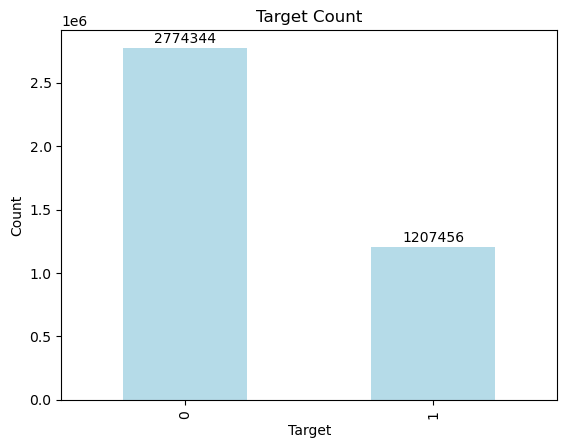

In [58]:
tar = df
tar = tar.groupby('Target').size()
tar_total = tar.sum()
ax = tar.plot(kind = 'bar', color='lightblue', alpha=0.9)
for index, value in enumerate(tar):
    ax.text(index, value+0.01*tar_total,str(value), ha='center')
plt.title("Target Count")
plt.ylabel("Count")
plt.show()

### Unique Values in each Column

In [59]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values} \n")

Index: [      1       2       3 ... 3981798 3981799 3981800] 

pH: [6.91786288 5.44376198 8.09190898 ... 7.62654931 8.3799973  7.95057255] 

Iron: [8.05382717e-05 2.01058594e-02 2.16712794e-03 ... 7.65572751e-01
 8.09512262e-08 2.15728616e-01] 

Nitrate: [3.73416664 3.81699383 9.92578827 ... 4.12512543 2.59646595 4.67785037] 

Chloride: [227.02985085 230.99562965 186.54087241 ...  99.14097122 279.78918791
 292.7277797 ] 

Lead: [7.84926195e-094 5.28661572e-076 4.17106885e-132 ... 7.12519629e-008
 1.29623943e-058 4.67942145e-012] 

Zinc: [1.24531707 0.52827971 3.80751128 ... 0.6249886  1.43489942 1.84206284] 

Color: ['Faint Yellow' 'Light Yellow' 'Colorless' 'Near Colorless' 'Yellow'] 

Turbidity: [0.01900728 0.31995564 0.00486702 ... 0.25253758 0.05147912 1.18116553] 

Fluoride: [0.62287379 0.42342341 0.22291192 ... 0.03163675 1.06347601 2.74724134] 

Copper: [0.43783531 0.43158763 0.61657435 ... 0.97567057 0.0428378  1.36715505] 

Odor: [1.68604901 3.41461917 0.79531011 ... 2.8237843

### Scatter plot to show PH level distribution for each Color

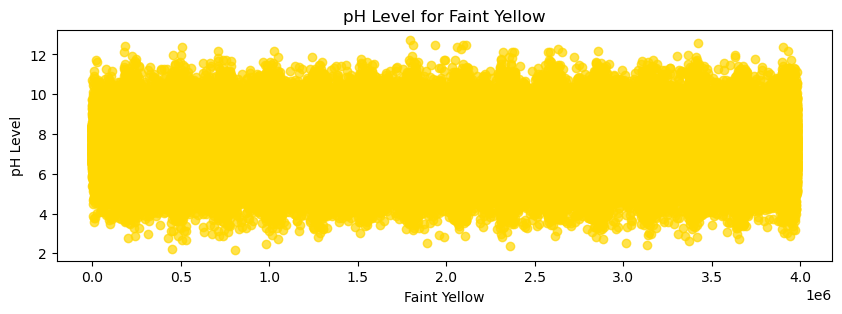

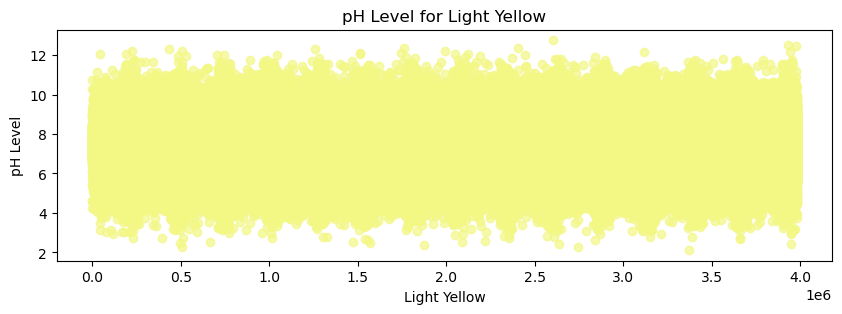

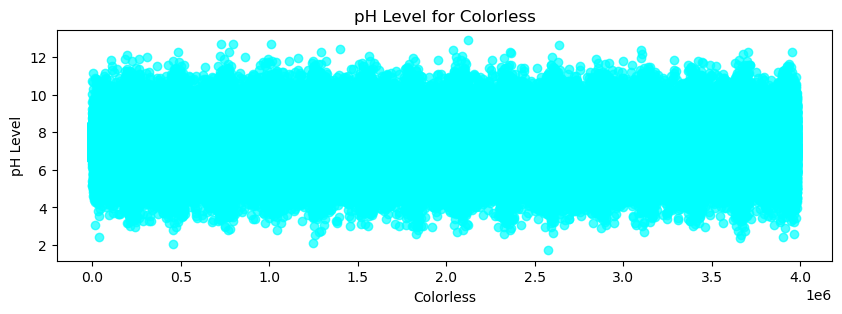

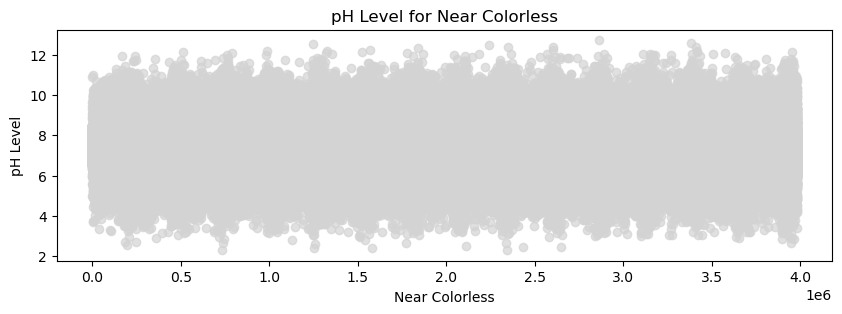

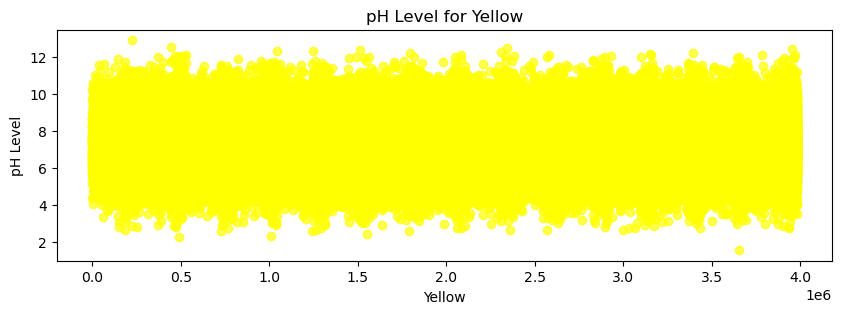

In [60]:
colors = ['gold', '#f3f783', 'cyan', 'lightgray','yellow']

for each,color_v in zip(df['Color'].unique(), colors):
    color = df[df['Color']==each]
    plt.figure(figsize=(10, 3))
    plt.scatter(color.index, color['pH'], color=color_v, alpha=0.7, label=each)
    plt.xlabel(each)
    plt.ylabel('pH Level')
    plt.title('pH Level for '+each)

### Box plot - pH vs Water Source

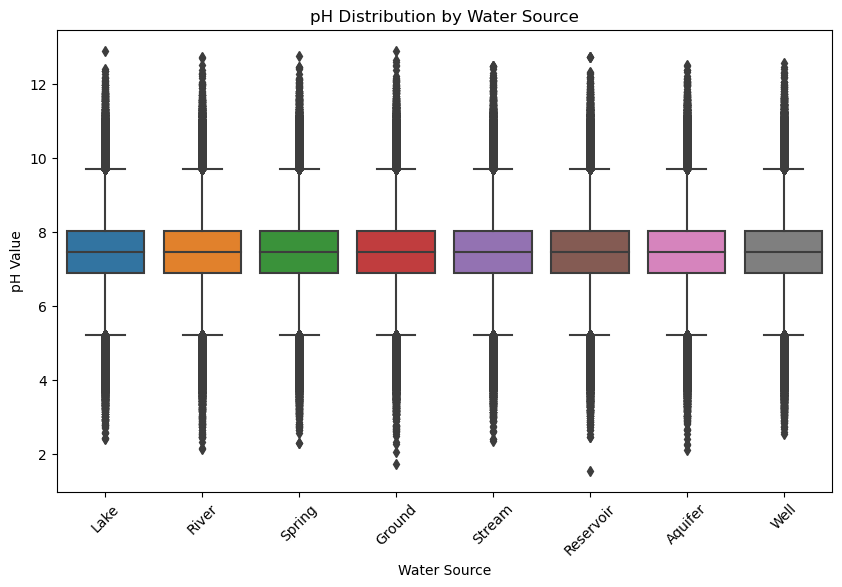

In [61]:
box = df[['pH','Source']]
plt.figure(figsize=(10,6))
sns.boxplot(x='Source',y='pH',data=box)
plt.title('pH Distribution by Water Source')
plt.xlabel('Water Source')
plt.ylabel('pH Value')
plt.xticks(rotation=45)
plt.show()

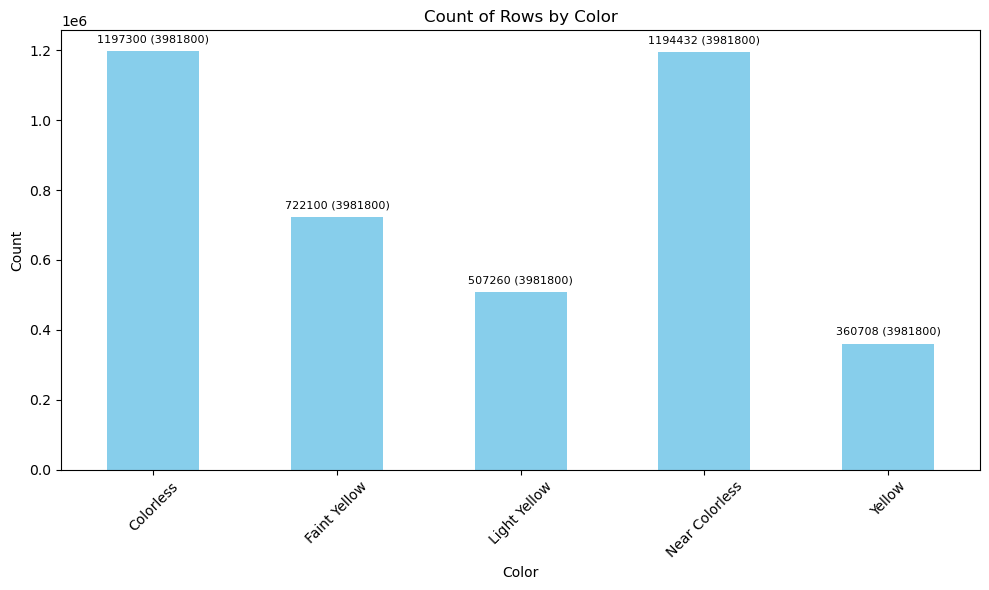

In [62]:
data = df
color_counts = data.groupby('Color').size()
total_values = color_counts.sum()
# Plotting
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count of Rows by Color')
plt.xticks(rotation=45)
plt.tight_layout()
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())} ({total_values})", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.show()

In [63]:
a = df.groupby("Source")[df.columns.difference(["Index","Color","Month","Day","Time of Day","Target"])].describe()
#a = df.groupby("Source")[["Color"]].describe()
a = a.drop(["count","25%","50%","75%","std"], level=1, axis=1)
pd.set_option('display.max_columns', None)
a

Air Temperature                           Chloride             \
                     mean        min         max        mean        min   
Source                                                                    
Aquifer         60.017871 -19.882403  140.508397  184.285079  30.464218   
Ground          59.989033 -32.010327  150.240892  184.312630  29.888535   
Lake            60.049348 -23.332773  138.813703  184.340281  32.347754   
Reservoir       59.981784 -33.870915  146.232813  184.421775  23.639187   
River           59.993289 -33.717138  144.725275  184.271857  25.850961   
Spring          60.012378 -21.035715  140.875607  184.270721  31.943488   
Stream          60.024601 -22.830563  139.957452  184.286497  30.252411   
Well            60.033016 -23.853825  145.898604  184.376333  27.765364   

                        Chlorine                      Conductivity             \
                   max      mean       min        max         mean        min   
Source                                                                          
Aquifer    1203.449937  3.256923  0.901992  10.163289   425.182867  18.787522   
Ground      990.286969  3.254687  1.050106  10.667837   425.312268  15.689328   
Lake       1102.438351  3.256480  1.009268  11.485010   424.892923  18.741201   
Reservoir  1430.548852  3.255392  0.993754  10.057411   425.105155  13.054824   
River      1083.372700  3.254199  1.035579  10.585699   424.936464  14.332961   
Spring     1158.523985  3.256951  1.018916  12.264470   424.432701  10.599984   
Stream     1071.783382  3.256602  1.033891  10.351240   424.672217  23.353254   
Well       1321.276280  3.255486  1.085141  10.997071   425.074499  11.862416   

                          Copper                           Fluoride            \
                   max      mean           min        max      mean       min   
Source                                                                          
Aquifer    1958.124307  0.515923  6.426809e-08  10.410412  0.968368  0.000015   
Ground     2147.044350  0.516114  3.533744e-08  11.886266  0.965673  0.000025   
Lake       1788.090906  0.516865  2.538513e-09  10.558518  0.962944  0.000005   
Reservoir  1892.941836  0.515902  2.982735e-10  11.547280  0.965619  0.000028   
River      2271.631722  0.515271  9.093203e-08  10.754859  0.963954  0.000037   
Spring     1862.311047  0.515981  1.723672e-07  10.706573  0.962732  0.000020   
Stream     1854.745885  0.517554  3.044058e-08   9.560404  0.964795  0.000010   
Well       1955.461950  0.515995  1.113638e-07   9.263258  0.964257  0.000012   

                          Iron                               Lead       \
                 max      mean           min        max      mean  min   
Source                                                                   
Aquifer    13.443082  0.127061  4.618385e-47  17.054740  0.001485  0.0   
Ground     12.684041  0.127553  3.264524e-48  16.495324  0.001510  0.0   
Lake       14.646254  0.127642  8.225557e-53  17.824913  0.001490  0.0   
Reservoir  11.413040  0.127998  5.387718e-41  16.431834  0.001490  0.0   
River      12.851710  0.127782  2.395051e-43  17.554213  0.001442  0.0   
Spring     13.538583  0.128143  9.113927e-41  14.530607  0.001501  0.0   
Stream     12.100949  0.127295  2.600204e-47  17.066160  0.001518  0.0   
Well       13.421895  0.128784  4.085339e-46  14.374686  0.001566  0.0   

                    Manganese                            Nitrate            \
                max      mean           min        max      mean       min   
Source                                                                       
Aquifer    4.766770  0.108589  6.716808e-45  17.433878  6.163405  0.420333   
Ground     3.503948  0.109794  1.549342e-47  16.896398  6.173947  0.286173   
Lake       3.224643  0.110270  1.620470e-43  16.837626  6.165946  0.341463   
Reservoir  4.637227  0.109438  4.793505e-55  19.344444  6.177882  0.386039   
River      4.489917  0.108599  6.220337

In [64]:
time_series = df[['Water Temperature', 'Air Temperature', 'Month','Day','Time of Day']]
time_series

,Water Temperature,Air Temperature,Month,Day,Time of Day
0,15.348981,71.220586,November,26.0,16.0
1,11.643467,44.891330,January,31.0,8.0
2,15.249416,69.336671,June,29.0,7.0
3,15.891905,61.139140,April,11.0,4.0
4,11.899376,14.010268,April,7.0,12.0
...,...,...,...,...,...
3981795,18.610969,82.445237,January,27.0,11.0
3981796,26.160882,45.900772,May,26.0,4.0
3981797,21.436974,70.493951,February,8.0,8.0
3981798,19.064632,67.052475,September,8.0,6.0


In [65]:
time_series['Timestamp'] = pd.to_datetime(time_series['Month'] + ' ' + time_series['Day'].astype(int).astype(str) , format='%B %d')
time_series = time_series.sort_values(by='Timestamp')
time_series

C:\Users\arohi\AppData\Local\Temp\ipykernel_1424\2655654033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Timestamp'] = pd.to_datetime(time_series['Month'] + ' ' + time_series['Day'].astype(int).astype(str) , format='%B %d')


,Water Temperature,Air Temperature,Month,Day,Time of Day,Timestamp
1780436,44.397005,64.221928,January,1.0,14.0,1900-01-01
1205429,9.601349,82.643488,January,1.0,2.0,1900-01-01
3732155,8.404491,53.920369,January,1.0,12.0,1900-01-01
3141091,18.650425,76.831609,January,1.0,18.0,1900-01-01
3378362,13.661034,90.600290,January,1.0,17.0,1900-01-01
...,...,...,...,...,...,...
2843656,27.577896,21.328733,December,31.0,20.0,1900-12-31
693571,7.624268,42.336448,December,31.0,11.0,1900-12-31
1696719,64.301502,60.477704,December,31.0,16.0,1900-12-31
3479059,11.307177,55.106170,December,31.0,22.0,1900-12-31


### Line Plot - Water temperature vs Time

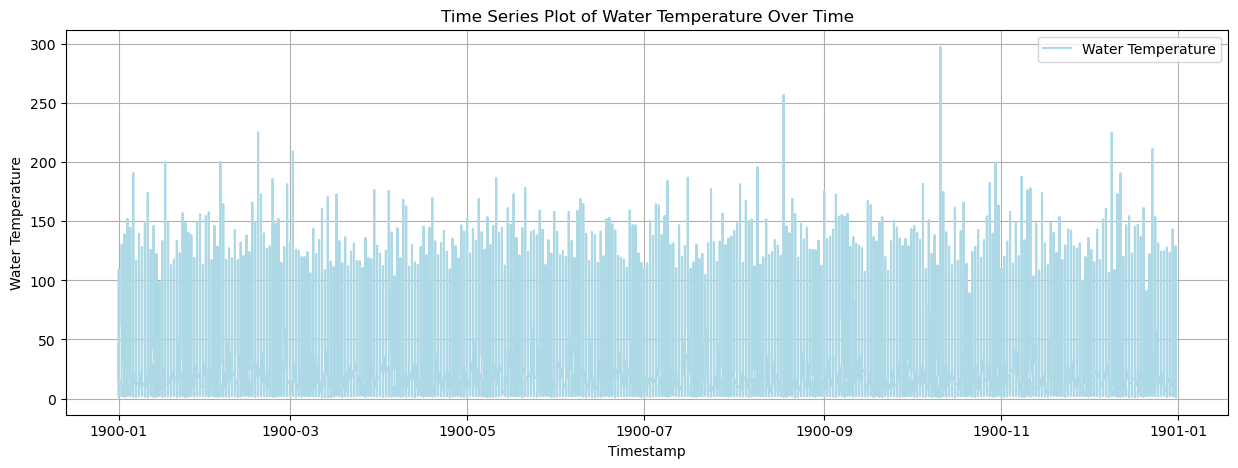

In [66]:
plt.figure(figsize=(15,5))
plt.plot(time_series['Timestamp'], time_series['Water Temperature'], color='lightblue', label='Water Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Water Temperature')
plt.title('Time Series Plot of Water Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Line Plot - Air temperature vs Time

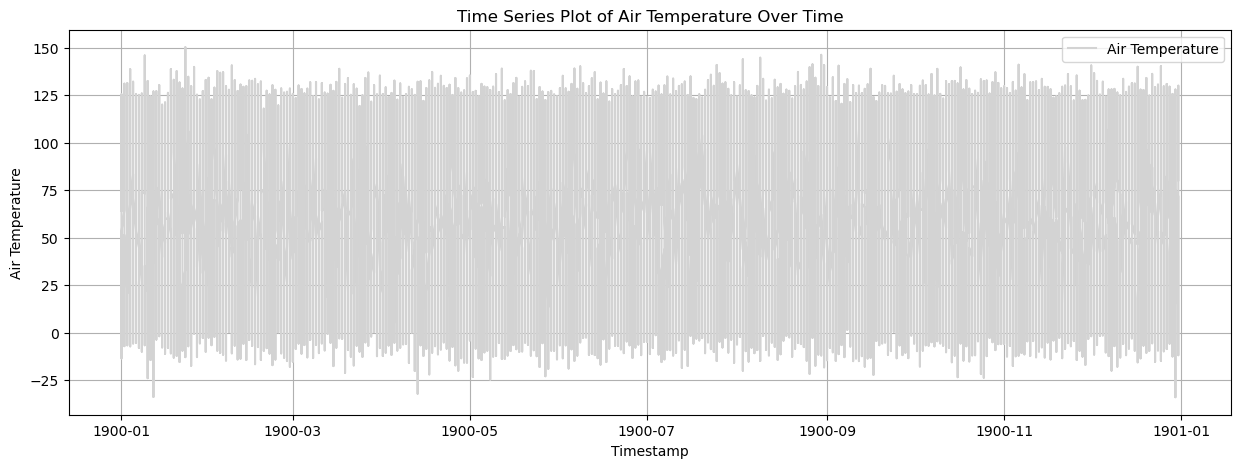

In [67]:
plt.figure(figsize=(15,5))
plt.plot(time_series['Timestamp'], time_series['Air Temperature'], color='lightgray', label='Air Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Air Temperature')
plt.title('Time Series Plot of Air Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Histogram of Odor attribute

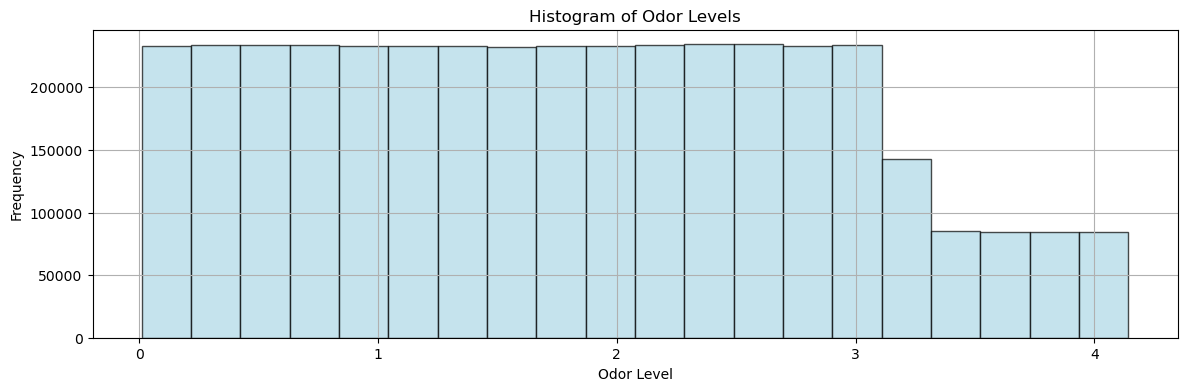

In [68]:
plt.figure(figsize=(14,4))
plt.hist(df['Odor'], bins=20, edgecolor='black', alpha=0.7, color='lightblue')
plt.xlabel('Odor Level')
plt.ylabel('Frequency')
plt.title('Histogram of Odor Levels')
plt.grid(True)
plt.show()


### Histogram+KDE - Turbidity

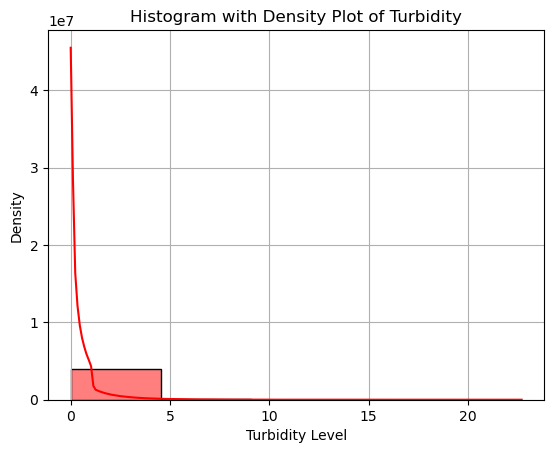

In [69]:
sns.histplot(df['Turbidity'], bins=5, kde=True, color='red')
plt.xlabel('Turbidity Level')
plt.ylabel('Density')
plt.title('Histogram with Density Plot of Turbidity')
plt.grid(True)
plt.show()

### Scatterplot on Conductivity vs TIme

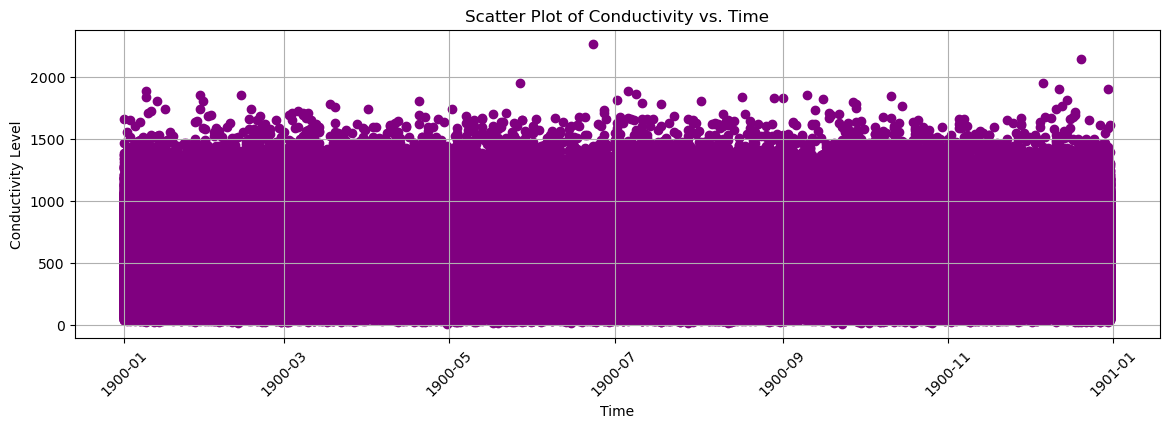

In [70]:
plt.figure(figsize=(14, 4))
plt.scatter(time_series['Timestamp'], df['Conductivity'], color='purple')
plt.xlabel('Time')
plt.ylabel('Conductivity Level')
plt.title('Scatter Plot of Conductivity vs. Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [71]:
chemicals = ['Zinc','Lead','Chloride','Chlorine','Copper','Fluoride','Iron','Manganese','Nitrate','Sulfate']
e = df.groupby(['Color'])[chemicals].mean()
e_percentage = (e.div(e.sum(axis=0), axis=1) * 100).round(2)
e_percentage

,Zinc,Lead,Chloride,Chlorine,Copper,Fluoride,Iron,Manganese,Nitrate,Sulfate
Color,,,,,,,,,,
Colorless,18.91,10.64,18.98,19.56,16.84,18.11,12.73,11.07,18.82,19.20
Faint Yellow,19.78,17.93,19.75,19.89,19.28,19.54,18.31,17.75,19.73,19.82
Light Yellow,20.62,24.92,20.57,20.25,21.74,21.06,24.04,25.19,20.69,20.44
Near Colorless,18.94,11.18,18.98,19.56,16.83,18.10,12.79,11.08,18.81,19.20
Yellow,21.76,35.33,21.72,20.74,25.31,23.19,32.12,34.92,21.95,21.35


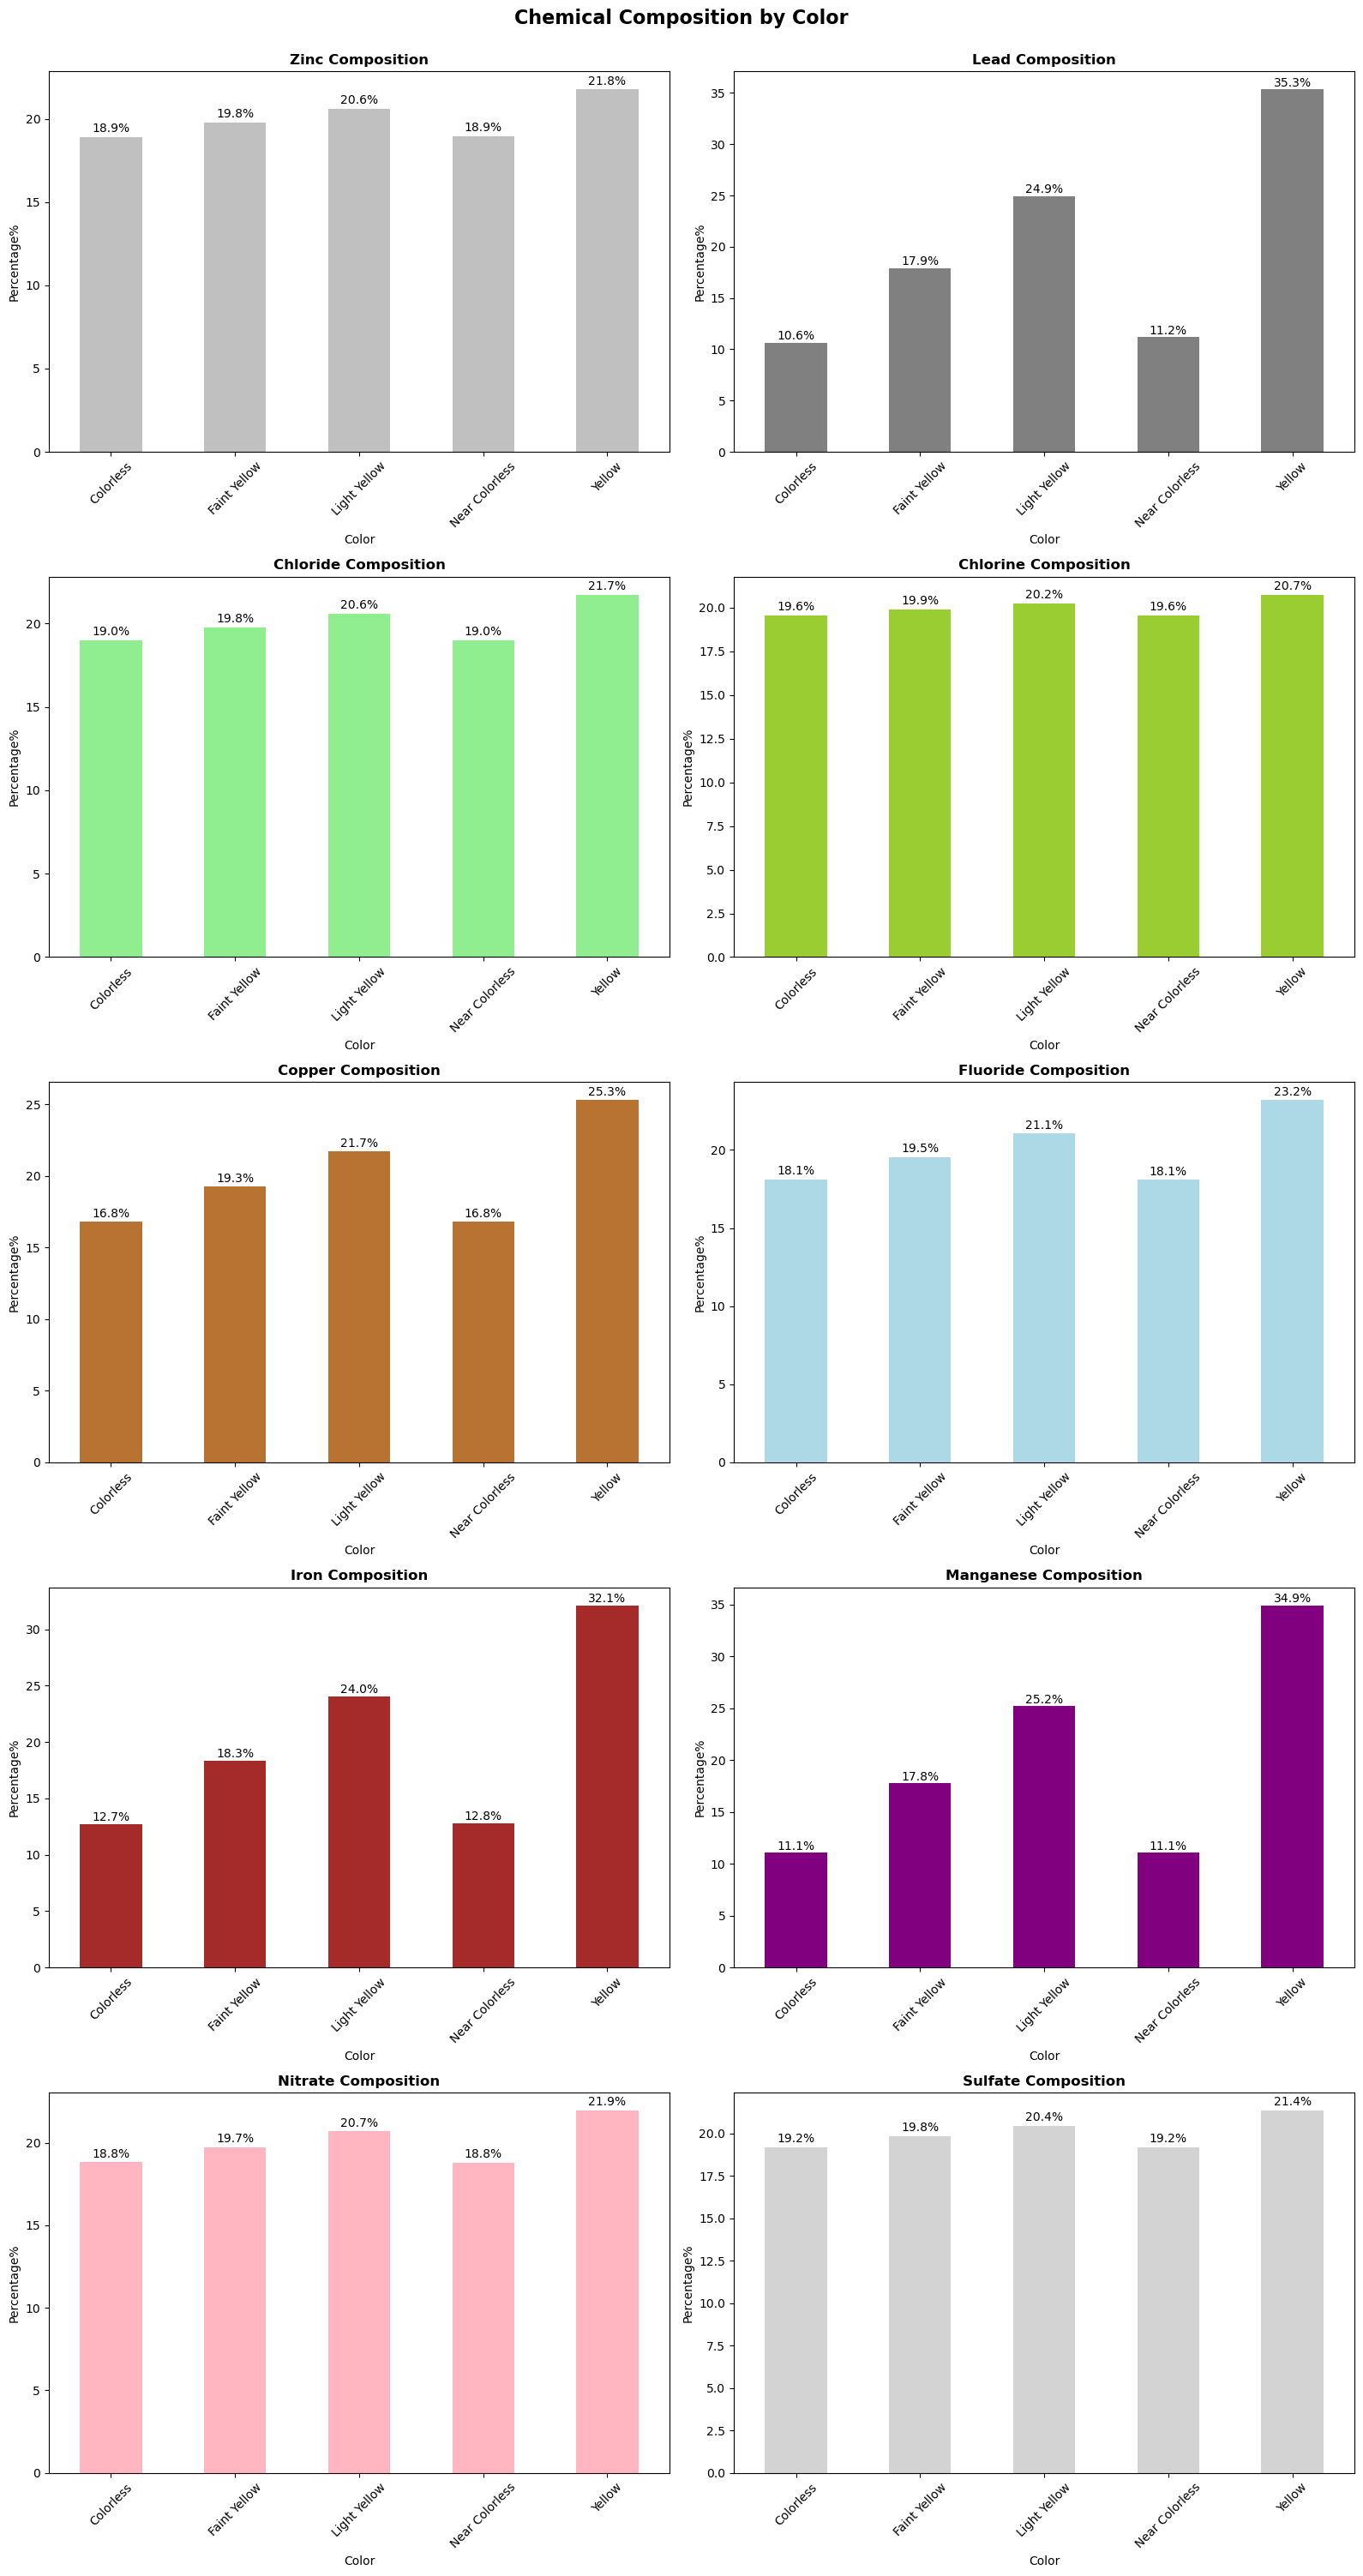

In [72]:
import math
total_plots = len(chemicals)
num_cols = 2
num_rows = math.ceil(total_plots / num_cols)

Color = {"Zinc" : "Silver", "Lead" : "Gray", "Chloride": "Lightgreen", "Chlorine" : "Yellowgreen","Copper" : "#b87333", 
         "Fluoride" : "Lightblue","Iron": "Brown","Manganese" : "purple","Nitrate" : "Lightpink","Sulfate" : "Lightgray"}

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 30))
axes = axes.flatten()
for i,chemical in enumerate(chemicals):
    ax = axes[i]
    e_percentage[chemical].plot(kind='bar', color=Color[chemical], ax=ax)
    ax.set_title(f"{chemical} Composition", fontweight='bold')
    ax.set_ylabel("Percentage%")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height +0.3), ha='center')
    
fig.suptitle("Chemical Composition by Color", y=1.0,fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
%matplotlib inline

 # <h1 style='text-align:center; font-size:40px'><font color =teal>Water Solubility Prediction Model</font></h1>

In [73]:
df_train = df.drop(['Index','Color','Source','Month','Target'], axis='columns') 
df_train

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day
0,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,15.348981,71.220586,26.0,16.0
1,5.443762,2.010586e-02,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,11.643467,44.891330,31.0,8.0
2,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,15.249416,69.336671,29.0,7.0
3,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,0.047803,1.016196,0.298093,3.144199,114.551427,160.062557,2.325094,6.020680e-16,214.553104,15.891905,61.139140,11.0,4.0
4,7.100650,3.019038e-03,3.620641,157.043934,6.459725e-148,0.112994,0.050613,0.842107,0.391602,2.713379,167.417837,583.295321,2.284971,8.840612e-07,113.909077,11.899376,14.010268,7.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981795,7.336513,7.989439e-04,3.807672,89.956213,4.258296e-34,3.027267,0.010288,0.745372,0.186357,2.585437,145.362834,533.374053,2.553024,1.428103e-02,1.634232,18.610969,82.445237,27.0,11.0
3981796,8.161283,1.468137e-05,6.552120,309.134213,3.368973e-44,2.127818,0.201469,3.419696,3.170538,1.931928,43.043399,366.349236,3.180415,7.086033e-04,19.767936,26.160882,45.900772,26.0,4.0
3981797,8.418457,9.517522e-05,8.427576,256.570863,4.751543e-26,4.967504,3.824532,0.541850,0.284838,0.299860,371.261098,339.150786,2.630130,9.608234e-03,545.990529,21.436974,70.493951,8.0,8.0
3981798,7.950573,2.157286e-01,4.677850,292.727780,4.679421e-12,1.842063,1.181166,2.747241,1.367155,3.749374,198.070171,521.505506,3.555576,1.875424e-11,514.136530,19.064632,67.052475,8.0,6.0


In [74]:
ohe1 = pd.get_dummies(df['Color']).astype(int)
ohe1

,Colorless,Faint Yellow,Light Yellow,Near Colorless,Yellow
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
3981795,0,1,0,0,0
3981796,0,0,1,0,0
3981797,0,1,0,0,0
3981798,0,0,0,1,0


In [75]:
ohe2 = pd.get_dummies(df['Source']).astype(int)
ohe2

,Aquifer,Ground,Lake,Reservoir,River,Spring,Stream,Well
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
3981795,0,0,1,0,0,0,0,0
3981796,0,0,0,0,0,0,1,0
3981797,0,0,0,0,0,0,0,1
3981798,0,1,0,0,0,0,0,0


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_month = le.fit_transform(df.Month)
le_month

array([ 9,  4,  6, ...,  3, 11,  6])

In [77]:
df_train = pd.concat([df_train,ohe1,ohe2],axis='columns')
df_train

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Colorless,Faint Yellow,Light Yellow,Near Colorless,Yellow,Aquifer,Ground,Lake,Reservoir,River,Spring,Stream,Well
0,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,15.348981,71.220586,26.0,16.0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,5.443762,2.010586e-02,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,11.643467,44.891330,31.0,8.0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,15.249416,69.336671,29.0,7.0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,0.047803,1.016196,0.298093,3.144199,114.551427,160.062557,2.325094,6.020680e-16,214.553104,15.891905,61.139140,11.0,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,7.100650,3.019038e-03,3.620641,157.043934,6.459725e-148,0.112994,0.050613,0.842107,0.391602,2.713379,167.417837,583.295321,2.284971,8.840612e-07,113.909077,11.899376,14.010268,7.0,12.0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981795,7.336513,7.989439e-04,3.807672,89.956213,4.258296e-34,3.027267,0.010288,0.745372,0.186357,2.585437,145.362834,533.374053,2.553024,1.428103e-02,1.634232,18.610969,82.445237,27.0,11.0,0,1,0,0,0,0,0,1,0,0,0,0,0
3981796,8.161283,1.468137e-05,6.552120,309.134213,3.368973e-44,2.127818,0.201469,3.419696,3.170538,1.931928,43.043399,366.349236,3.180415,7.086033e-04,19.767936,26.160882,45.900772,26.0,4.0,0,0,1,0,0,0,0,0,0,0,0,1,0
3981797,8.418457,9.517522e-05,8.427576,256.570863,4.751543e-26,4.967504,3.824532,0.541850,0.284838,0.299860,371.261098,339.150786,2.630130,9.608234e-03,545.990529,21.436974,70.493951,8.0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,1
3981798,7.950573,2.157286e-01,4.677850,292.727780,4.679421e-12,1.842063,1.181166,2.747241,1.367155,3.749374,198.070171,521.505506,3.555576,1.875424e-11,514.136530,19.064632,67.052475,8.0,6.0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [78]:
df_train['Month'] = le_month
df_train

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Colorless,Faint Yellow,Light Yellow,Near Colorless,Yellow,Aquifer,Ground,Lake,Reservoir,River,Spring,Stream,Well,Month
0,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,15.348981,71.220586,26.0,16.0,0,1,0,0,0,0,0,1,0,0,0,0,0,9
1,5.443762,2.010586e-02,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,11.643467,44.891330,31.0,8.0,0,0,1,0,0,0,0,0,0,1,0,0,0,4
2,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,15.249416,69.336671,29.0,7.0,0,0,1,0,0,0,0,0,0,0,1,0,0,6
3,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,0.047803,1.016196,0.298093,3.144199,114.551427,160.062557,2.325094,6.020680e-16,214.553104,15.891905,61.139140,11.0,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,7.100650,3.019038e-03,3.620641,157.043934,6.459725e-148,0.112994,0.050613,0.842107,0.391602,2.713379,167.417837,583.295321,2.284971,8.840612e-07,113.909077,11.899376,14.010268,7.0,12.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981795,7.336513,7.989439e-04,3.807672,89.956213,4.258296e-34,3.027267,0.010288,0.745372,0.186357,2.585437,145.362834,533.374053,2.553024,1.428103e-02,1.634232,18.610969,82.445237,27.0,11.0,0,1,0,0,0,0,0,1,0,0,0,0,0,4
3981796,8.161283,1.468137e-05,6.552120,309.134213,3.368973e-44,2.127818,0.201469,3.419696,3.170538,1.931928,43.043399,366.349236,3.180415,7.086033e-04,19.767936,26.160882,45.900772,26.0,4.0,0,0,1,0,0,0,0,0,0,0,0,1,0,8
3981797,8.418457,9.517522e-05,8.427576,256.570863,4.751543e-26,4.967504,3.824532,0.541850,0.284838,0.299860,371.261098,339.150786,2.630130,9.608234e-03,545.990529,21.436974,70.493951,8.0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,1,3
3981798,7.950573,2.157286e-01,4.677850,292.727780,4.679421e-12,1.842063,1.181166,2.747241,1.367155,3.749374,198.070171,521.505506,3.555576,1.875424e-11,514.136530,19.064632,67.052475,8.0,6.0,0,0,0,1,0,0,1,0,0,0,0,0,0,11


In [79]:
X = df_train

In [80]:
y = df['Target']

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [82]:
print(len(X_train),len(X_test))

3185440 796360


In [83]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=10000)

In [84]:
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [85]:
lr_model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [86]:
print("Logistic Regression Accuracy:" ,lr_model.score(X_test,y_test))

Logistic Regression Accuracy: 0.7912012155306645


### Confusion Matrix - Logistic Regression

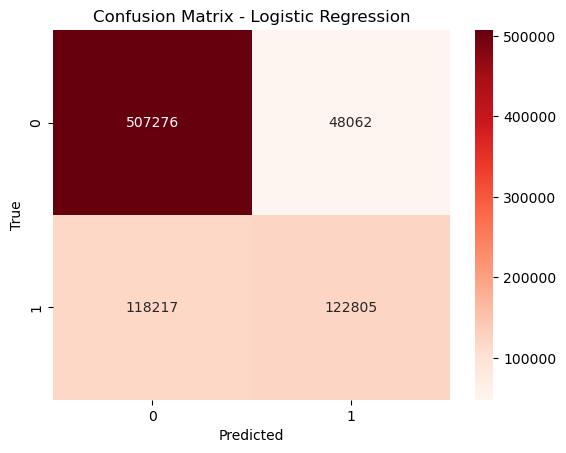

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Logistic Regression - ROC Curve

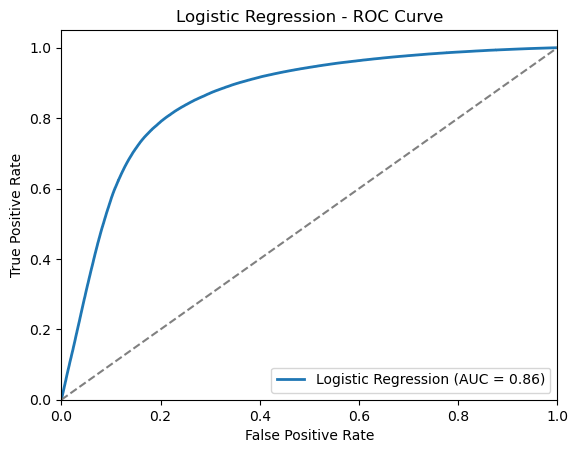

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob)
auc_lr = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr_lr, tpr_lr, lw=2, label='Logistic Regression (AUC = {:.2f})'.format(auc_lr))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Logistic Regression - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



In [89]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
dt_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [91]:
print("Decision Tree Accuracy:" ,dt_model.score(X_test,y_test))

Decision Tree Accuracy: 0.8315284544678286


### Confusion Matrix - Decision Tree

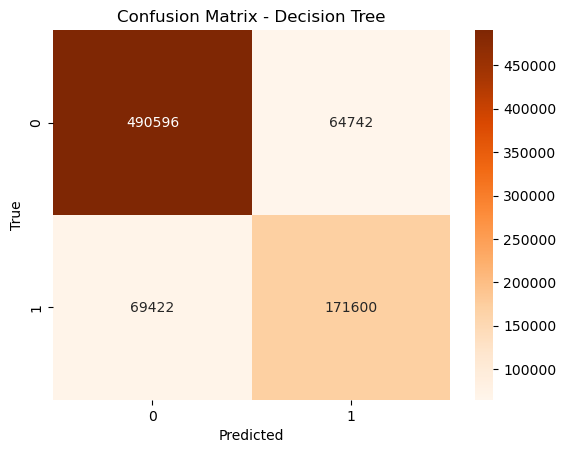

In [92]:
y_pred1 = dt_model.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred1)

sns.heatmap(cm1,annot=True,fmt = "d",cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()


### Decision Tree - ROC Curve

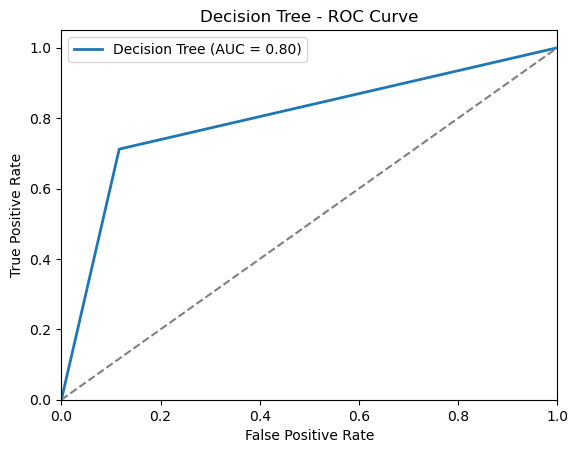

In [93]:
y_pred_prob1 = dt_model.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,y_pred_prob1)
auc_dt = roc_auc_score(y_test, y_pred_prob1)

plt.figure()
plt.plot(fpr_dt, tpr_dt, lw=2, label='Decision Tree (AUC = {:.2f})'.format(auc_dt))
plt.plot([0,1], [0,1], linestyle = "--", color = "grey" )
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.title("Decision Tree - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
rf_model.predict(X_test)

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [96]:
print("Random Forest Accuracy:" ,rf_model.score(X_test,y_test))

Random Forest Accuracy: 0.887923803305038


### Confusion Matrix - Random Forest

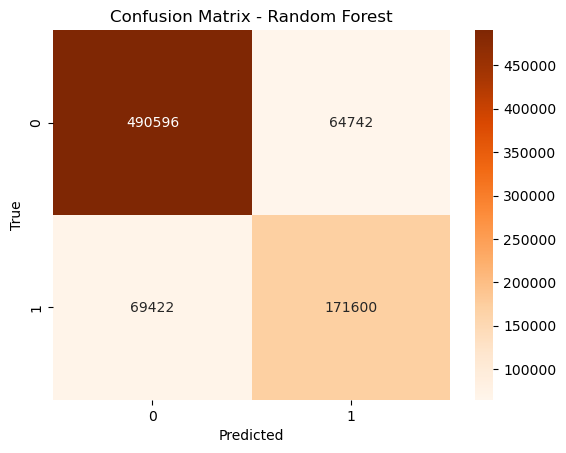

In [97]:
y_pred2 = rf_model.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)

sns.heatmap(cm1,annot=True,fmt = "d",cmap="Oranges")
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()


### Random Forest - ROC Curve

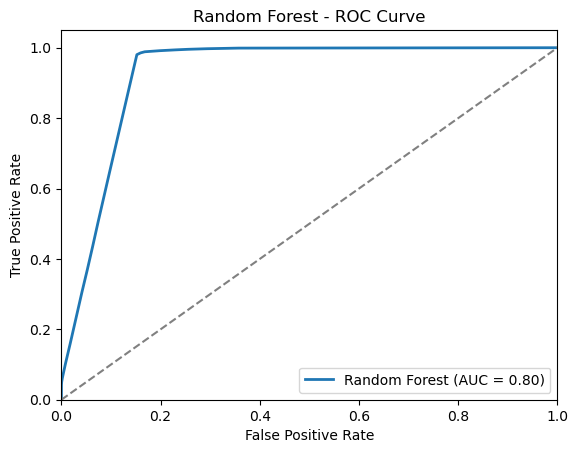

In [98]:
y_pred_prob2 = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,y_pred_prob2)
auc_rf = roc_auc_score(y_test, y_pred_prob1)

plt.figure()
plt.plot(fpr_rf, tpr_rf, lw=2, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot([0,1], [0,1], linestyle = "--", color = "grey" )
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [102]:
import xgboost as xgb

In [103]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [104]:
params= {
    'objective': 'multi:softmax',
    "eta" : 0.1,
    'num_class': 2  
}

xg_model = xgb.train(params,train)

In [105]:
pred = xg_model.predict(test)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8550768496659802

### Confusion Matrix - XG Boost

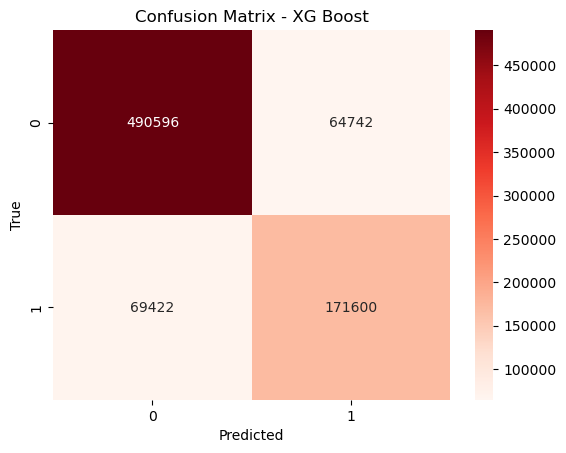

In [110]:
y_pred3 = xg_model.predict(test)
cm3 = confusion_matrix(y_test,y_pred3)

sns.heatmap(cm1,annot=True,fmt = "d",cmap="Reds")
plt.title("Confusion Matrix - XG Boost")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()


### XGBoost - ROC Curve

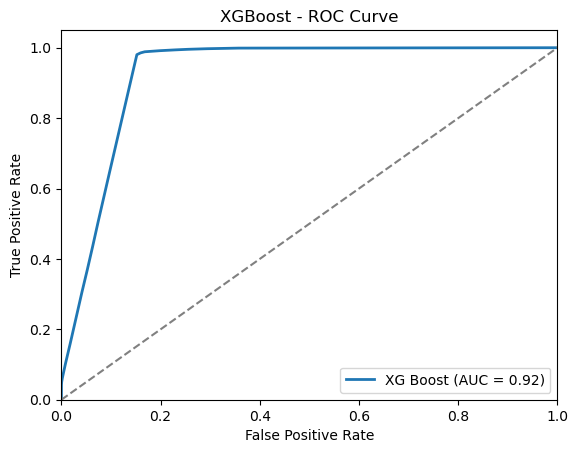

In [111]:
y_pred_prob3 = xg_model.predict(test)

fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test,y_pred_prob2)

auc_xg = roc_auc_score(y_test, y_pred_prob2)

plt.figure()
plt.plot(fpr_xg, tpr_xg, lw=2, label='XG Boost (AUC = {:.2f})'.format(auc_xg))
plt.plot([0,1], [0,1], linestyle = "--", color = "grey" )
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.title("XGBoost - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

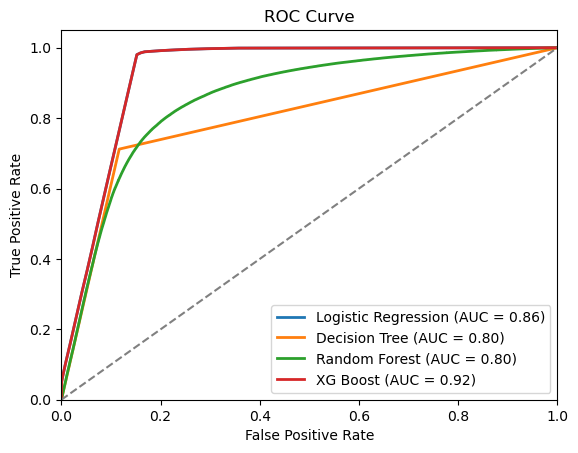

In [112]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, lw=2, label='Logistic Regression (AUC = {:.2f})'.format(auc_lr))
plt.plot(fpr_dt, tpr_dt, lw=2, label='Decision Tree (AUC = {:.2f})'.format(auc_dt))
plt.plot(fpr_lr, tpr_lr, lw=2, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot(fpr_xg, tpr_xg, lw=2, label='XG Boost (AUC = {:.2f})'.format(auc_xg))
plt.plot([0,1], [0,1], linestyle = "--", color = "grey" )
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()